# 4. 분류

## 4-1. 분류(Classification)의 개요

- 분류 알고리즘 유형
  - 베이즈 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
  - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
  - 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
  - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는  서포트 벡터 머신(Support Vector Machine)
  - 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
  - 심층 연결 기반의 신경망
  - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**
  
  
- 앙상블: 서로 다른/같은 알고리즘을 단순히 결합한 형태도 있으나 보통 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨
  - 배깅(Bagging): 랜덤 포레스트 
  - 부스팅(Boosting): 그래디언트 부스팅 -> 예측 성능 good but 수행 시간이 김  
    => XGBoost, LightGBM

## 4-2. 결정 트리

데이터에 있는 규칙을 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 알고리즘  
트리가 깊어질수록 예측 성능이 저하될 가능성이 높음 -> 데이터가 균일하게 잘 분할하는 것이 중요

![사진](https://images.velog.io/images/ljs7463/post/f2da1e98-f4ee-408a-bb8b-444bbcd04997/bandicam%202021-06-15%2021-24-03-854.jpg)

- 정보의 균일도를 측정하는 방법
  - 정보 이득(Information Gain) 지수: 1 - 엔트로피 지수(데이터의 혼잡도)
  - 지니 계수: 경제학에서 사용하는 불평등 지수(낮을수록 균일도가 높은 것으로 판단)  
  
사이킷런의 결정 트리 알고리즘은 지니계수를 이용해 데이터셋을 분할

### 결정 트리 모델의 특징

- 쉽고 직관적
- 균일도만 신경 쓰면 되므로 전처리 필요 X
- 과적합으로 인해 정확도가 떨어짐(트리의 크기를 사전에 제한하는 튜닝 필요)

### 결정 트리 파라미터

- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수. 작게 설정할수록 과적합 가능성 증가 / 디폴트=2
- min_samples_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수. 과적합 제어
- max_features: 최적의 분할을 위해 고려할 최대 피처 개수(피처의 비율로도 설정 가능) / 디폴트=None(전체 피처)
- max_depth: 트리의 최대 깊이 / 디폴트=None(깊이제한X)
- max_leaf_nodes: 말단 노드의 최대 개수

### 결정 트리 모델의 시각화

In [1]:
! pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.5 MB/s eta 0:00:00


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state = 156) # 모델 생성

iris_data = load_iris()  # 붓꽃 데이터 로드
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)  # 모델 학습



DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

# 그래프 형태로 시각화할 수 있는 출력 파일 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)  


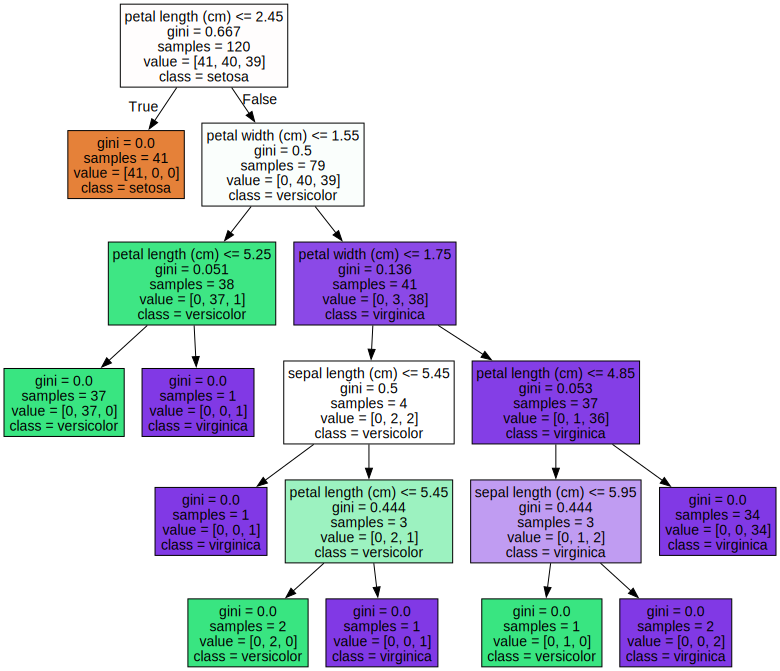

In [4]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


samples: 샘플 개수  
value: 각 카테고리별 샘플 개수  
class: 샘플이 가장 많은 카테고리  

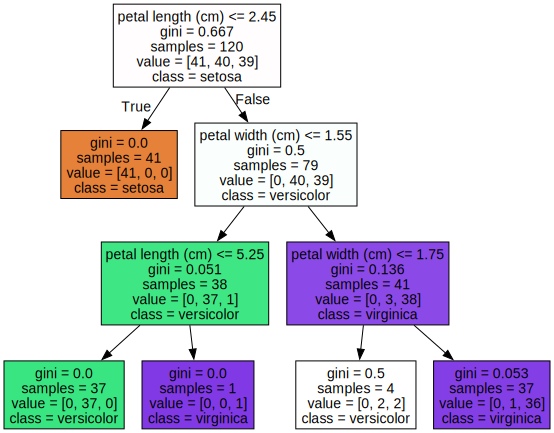

In [5]:
# max_depth=3으로 설정
dt_clf2 = DecisionTreeClassifier(random_state = 156, max_depth=3) 
dt_clf2.fit(X_train, y_train)

export_graphviz(dt_clf2, out_file = 'tree2.dot', class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)  

with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

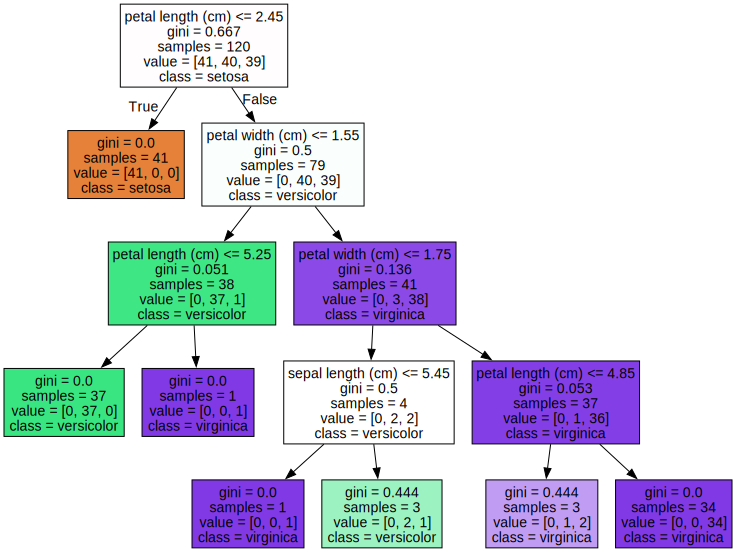

In [6]:
# min_samples_split=4

dt_clf3 = DecisionTreeClassifier(random_state = 156, min_samples_split=4) 
dt_clf3.fit(X_train, y_train)

export_graphviz(dt_clf3, out_file = 'tree3.dot', class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)  

with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

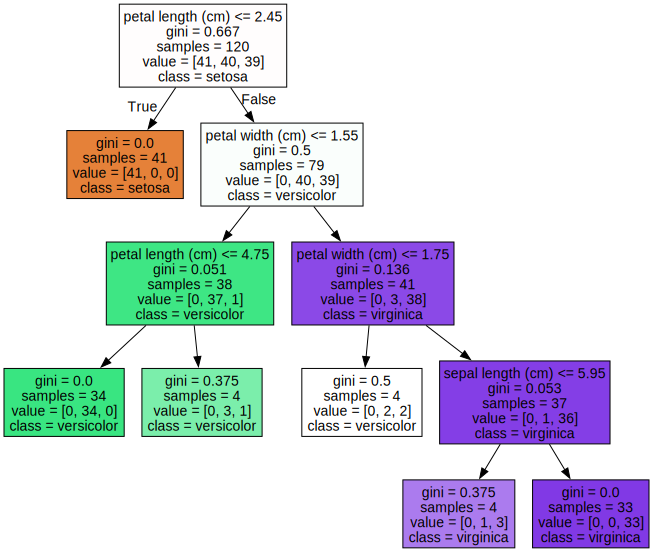

In [7]:
# min_samples_leaf=4

dt_clf4 = DecisionTreeClassifier(random_state = 156, min_samples_leaf=4) 
dt_clf4.fit(X_train, y_train)

export_graphviz(dt_clf4, out_file = 'tree4.dot', class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)  

with open('tree4.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<Axes: >

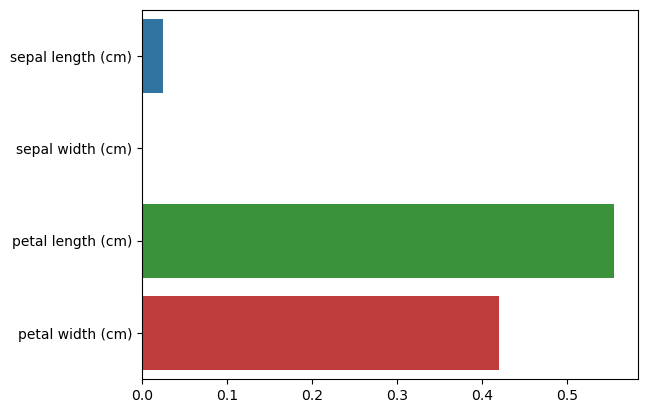

In [8]:
# 피처 중요도

import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))  # 중요도 추출

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):  # 피처별 중요도 매핑
    print('{0}: {1:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)

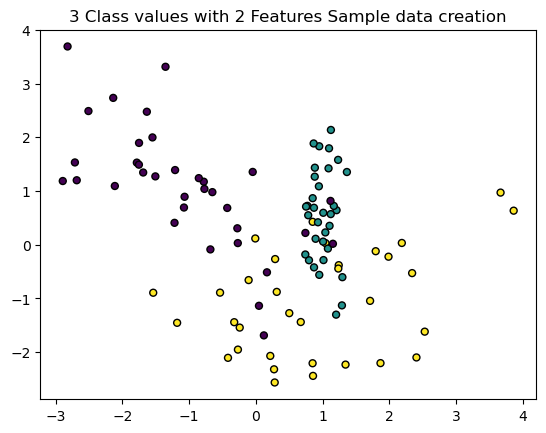

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 피처 2개, 클래스 3개의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

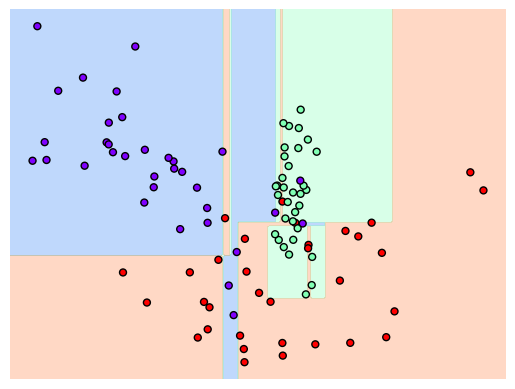

In [12]:
from sklearn.tree import DecisionTreeClassifier

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치까지 분류해서 경계가 이상해진 모습..

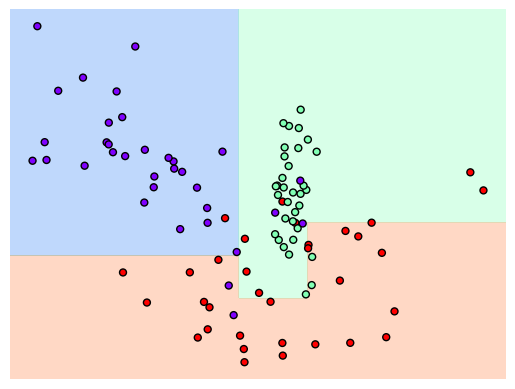

In [13]:
# min_samples_leaf=6으로 조건 제약 후 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('/Users/dayoungcho/Desktop/공부/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()   # 42개의 피처명이 중복됨

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
# 중복된 피쳐명에 _1,_2 등 붙이는 함수 정의
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 
                                                              'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [6]:
import pandas as pd

def get_human_dataset():

    feature_name_df = pd.read_csv('/Users/dayoungcho/Desktop/공부/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt',
    sep='\s+', header=None, names=['column_index', 'column_name'])

    new_feature_name_df = get_new_feature_name_df(feature_name_df)  # 중복된 피처명 수정해서 신규 피처명 데이터프레임 생성

    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv('/Users/dayoungcho/Desktop/공부/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt',
                        sep='\s+', header=None, names=feature_name)
    X_test = pd.read_csv('/Users/dayoungcho/Desktop/공부/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt',
                        sep='\s+', header=None, names=feature_name)
    
    y_train = pd.read_csv('/Users/dayoungcho/Desktop/공부/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt',
                        sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/Users/dayoungcho/Desktop/공부/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt',
                        sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [7]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())  # 데이터 7352개, 피처 561개

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [9]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
y_train['action'].value_counts() # 비교적 고르게 분포..

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼파라미터:\n', dt_clf.get_params)

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼파라미터:
 <bound method BaseEstimator.get_params of DecisionTreeClassifier()>


In [13]:
# 트리의 깊이가 예측 정확도에 주는 영향

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8564
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


In [15]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.843853
1,8,0.856375
2,10,0.848895
3,12,0.840191
4,16,0.842094
5,20,0.846582
6,24,0.845768


In [16]:
# max_depth 값을 변화시키면서 모델 학습/예측 성능 측정

max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [20]:
# max_depth&min_samples_split 값을 변화시키면서 모델 학습/예측 성능 측정

params = {
    'max_depth': [8, 12, 16,20],
    'min_samples_split': [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)   # 최적 파라미터: 깊이 8, min sampe 16

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [21]:
# 최적 파라미터로 예측 수행
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


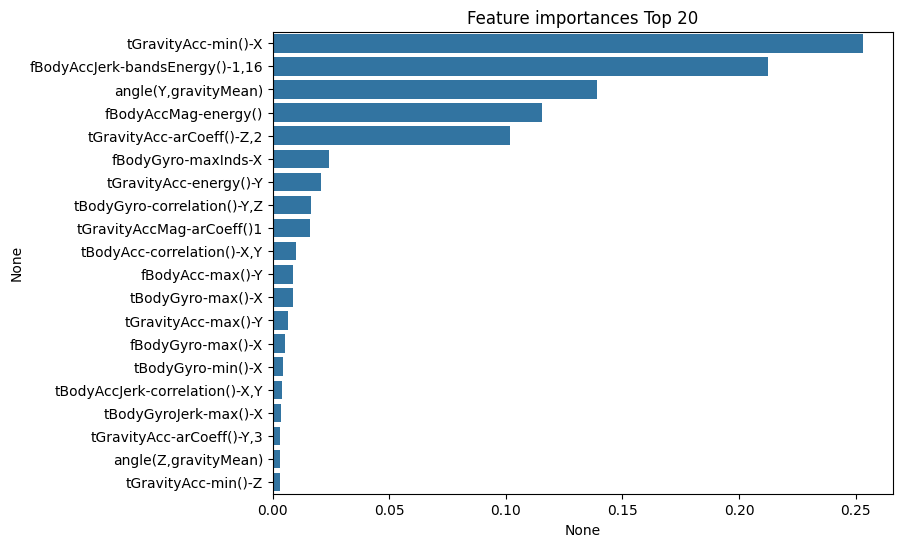

In [24]:
# 피처 중요도 

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 4-3. 앙상블 학습

### 앙상블 학습 개요

여러 개의 분류기의 예측을 결합해서 최종 예측을 도출  
정형 데이터 분류 시 뛰어난 성능 보여줌  
  
- Bagging
  - bootstrap aggregation 의 약자
  - 각각의 분류기가 같은 유형의 알고리즘 기반임
  - 샘플을 여러번 뽑아서(bootstrap) 각 모델을 학습시킨 다음 결과물을 집계(aggregation) 하는 방법
  - Random forest
    
- Voting
  - 각각 다른 알고리즘을 이용한 분류기를 결합하는 방식
  -  최종 예측 값을 투표
  -  linear regression, KNN, SVM

![아아](https://blog.kakaocdn.net/dn/kAWZ0/btrFLCyDRkE/KfjMkKzgImKVJWrQwinEk1/img.png)
    
- Boosting
  - 여러 개의 분류기가 순차적으로 학습 수행
  - 앞에서 학습한 분류기가 잘못 예측한 데이터에 대해서 다음 분류기에서는 가중치 부여
  - gradient boost, XGBoost, LightGBM

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅: 예측치들 중 다수의 분류기가 결정한 값을 결과값으로 선정
- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 평균 내서 이들 중 확률이 가장 높은 레이블 값을 선정  
    
일반적으로 소프트 보팅이 사용됨

### 보팅 분류기

In [25]:
# 위스콘신 유방암 데이터셋

import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [26]:
# 로지스틱 회귀와 KNN을 이용한 앙상블 모델

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

classifiers = [lr_clf, knn_clf]   # 개별 분류기 성능
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))


vo_clf.fit(X_train, y_train)    # 보팅 분류기 성능
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))



LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386
Voting 분류기 정확도: 0.9474


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

## 4-4. 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습

![랜포](https://itwiki.kr/images/thumb/1/12/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.png/1200px-%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.png)

- 결정 트리 기반 배깅 알고리즘  
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습 수행 후   
- 최종적으로 모든 분류기가 보팅을 통해 예측 결정    
    
-  개별 트리가 학습하는 데이터셋은 부트스트랩 방식으로 샘플링된 데이터임
   -  부트스트래핑(Bootstrapping): 전체 데이터에서 일부 개별 데이터가 subset 내에 중첩되게 샘플링

In [27]:
# HAR 데이터셋으로 랜덤 포레스트 학습

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

- n_estimators:사용할 결정 트리의 개수
  - 디폴트: 10
- max_features: 최적의 분할을 위해 고려할 최대 피처 개수
  - 결정 트리와 달리 디폴트=auto(sqrt(전체 피처 개수))
- 이외 결정 트리에서 사용되는 파라미터들(max_depth, min_samples_leaf...)

In [29]:
# gridsearchCV를 이용하여 하이퍼파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6,8,10,12],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)   # n_jobs=-1: 모든 CPU 코어를 이용하여 학습
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [30]:
# 최적 하이퍼 파라미터로 예측 성능 측정

rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


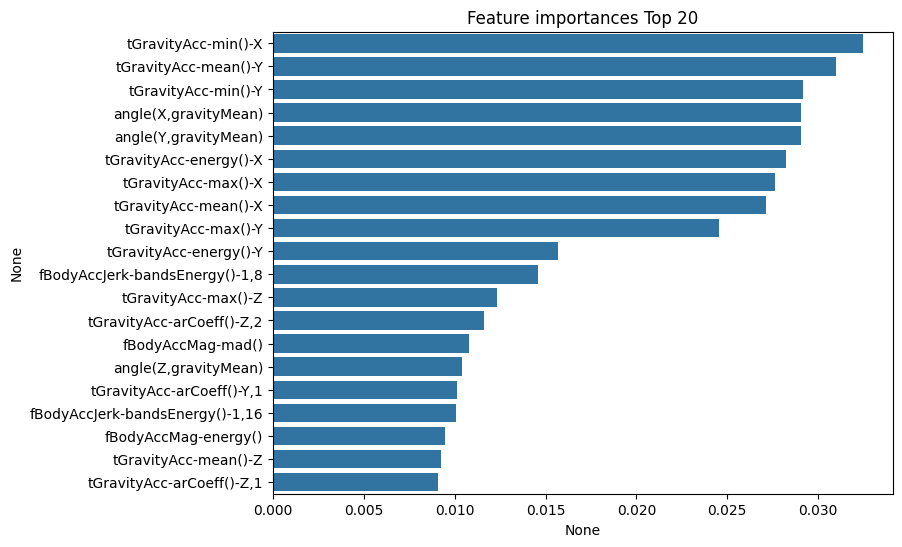

In [31]:
# 피처 중요도

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 4-5. GBM(Gradient Boosting Machine)

### GBM의 개요 및 실습

부스팅의 대표적인 구현은 AdaBoost와 Gradient Boosting이 있음
- AdaBoost 학습 과정: 약한 학습기로 학습 후 잘못 분류된 데이터에 대해 가중치 값 부여, 여러 분류 기준에 대해 다음 과정을 반복한 후 모든 예측 결정 기준을 결합하여 예측 수행
- GBM: 가중치 업데이트에 경사 하강법 이용

In [32]:
# GBM으로 HAR 데이터셋 분류

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()  # GBM 수행 시간 측정을 위해 시작 시간 설정

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.4f}초'.format(time.time()-start_time))

GBM 정확도: 0.9393
GBM 수행 시간: 798.4105초


### GBM 하이퍼 파라미터 및 튜닝

- loss: 경사하강법에서 사용할 비용 함수를 지정 / 디폴트: deviance
- learning_rate: weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수.  
                               n_estimators와 상호 보완적으로 조합해 사용 / 디폴트: 0.1
- n_estimators: weak learner의 개수 / 디폴트:100
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율. 과적합 우려 시 1보다 작은 값으로 설정 / 디폴트:1

In [33]:
# GridSearchCV로 최적 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100,500],
    'learning_rate': [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


In [34]:
# 최적 파라미터로 예측 수행

gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9393


## 4-6. XGBoost(eXtra Gradient Boost)

### XGBoost 개요

GBM 기반의 모델이지만 느린 수행 시간 및 과적합 규제 부재 등의 문제가 해결된 모델임.  
병렬 CPU 환경에서 병렬 학습이 가능해서 기존 GBM보다 빠른 학습 가능  
early stopping 기능이 있어서 n_estimators에 지정된 부스팅 반복 횟수에 도달하지 않아도 예측 오류가 더 개선되지 않으면 자동으로 중단됨

본래 XGBoost는 C/C++으로 작성되어 있음.  
파이썬 패키지로는 독자적인 버전(파이썬 래퍼 XGBoost)와 사이킷런과 연동되는 버전(사이킷런 래퍼 XGBoost 모듈) 두 개가 존재

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

유형별로 분류:
- 일반 파라미터: 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터. 바꾸는 경우 거의 X
  - **booster**: gbtree(tree based model) 또는 gblinear(linear model) / 디폴트: gbtree
  - **silent**: 출력 메시지를 나타낼 지 여부 / 디폴트: 0(출력 메시지를 나타내기)  
    
- 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭
  - **eta(learning rate)**: 부스팅 스텝을 반복적으로 수행할때 업데이터되는 학습률 값 / 디폴트: 0.3(사이킷런 래퍼 모듈은 0.1)
  - **num_boost_rounds**: GBM의 n_estimators와 동일
  - **min_child_weight**: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합(클수록 자제) / 디폴트: 1
  - **gamma**: 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리함 / 디폴트: 0
  - **max_depth**: 트리 알고리즘과 동일. 0이면 깊이에 제한 X, 주로 3~10 사이로 지정 / 디폴트: 6
  - **sub_sample**: GBM과 동일 / 디폴트: 1
  - **colsample_bytree**: 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용 / 디폴트: 1
  - **lambda**: L2 Regularization 적용 값 / 디폴트: 1
  - **alpha**: L1 REgularization 적용 값 / 디폴트: 0
  - **scale_pos_weight**: 특정 값으로 치우친 클래스로 구성된 데이터셋의 균형 유지에 사용 / 디폴트: 1  
  
- 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정
  - **objective**: 최솟값을 가져야 할 손실 함수
  - **binary:logistic**: 이진 분류일 때 적용
  - **multi:softmax**: 다중 분류일 때 적용 / 이 때 num_class(레이블 클래스의 개수) 파라미터를 지정해줘야 함
  - **multi:softprob**: 다중 분류일 때 적용 / 개별 레이블 클래스의 해당되는 예측 확률을 반환
  - **eval_metric**: 검증에 사용되는 함수 정의 / 디폴트: 회귀는 rmse, 분류는 error
    - rmse: Root Mean Square Error
    - mae: Mean Absolute Error
    - logloss: Negative Log-likelihood
    - error: Binary classification error rate
    - merror: Multiclass classification error rate
    - mlogloss: Multiclass logloss
    - auc: Area Under the Curve

과적합 문제가 심각한 경우:
- eta(learning rate) 값을 낮추기 / num_round(혹은 n_estimators) 높이기
- max_depth 값을 낮추기
- min_child_weight 값을 높이기
- gamma 값을 높이기
- subsample/colsample_bytree 조정하기

### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [1]:
import xgboost
print(xgboost.__version__)

/Users/dayoungcho/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1.7.3


In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [5]:
# 모델에 적용할 DMatrix 객체 생성

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [6]:
# 하이퍼파라미터 설정

params = {'max_depth': 3, 
          'eta': 0.1,
           'objective': 'binary:logistic',
            'eval_metric': 'logloss',
             'early_stoppings': 100 }

num_rounds = 400

In [7]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, 
                      early_stopping_rounds = 100, evals = wlist)

[01:24:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[

In [8]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값')
print(np.round(pred_probs[:10],3))   # 이진 분류이지만 예측 결과 클래스값이 아닌 예측 결과를 추정할 수 있는 확률 값이 반환됨

predict() 수행 결과값
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]


In [9]:
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체 preds에 저장

preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [12]:
# 오차행렬

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import f1_score
def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC: 0.9951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

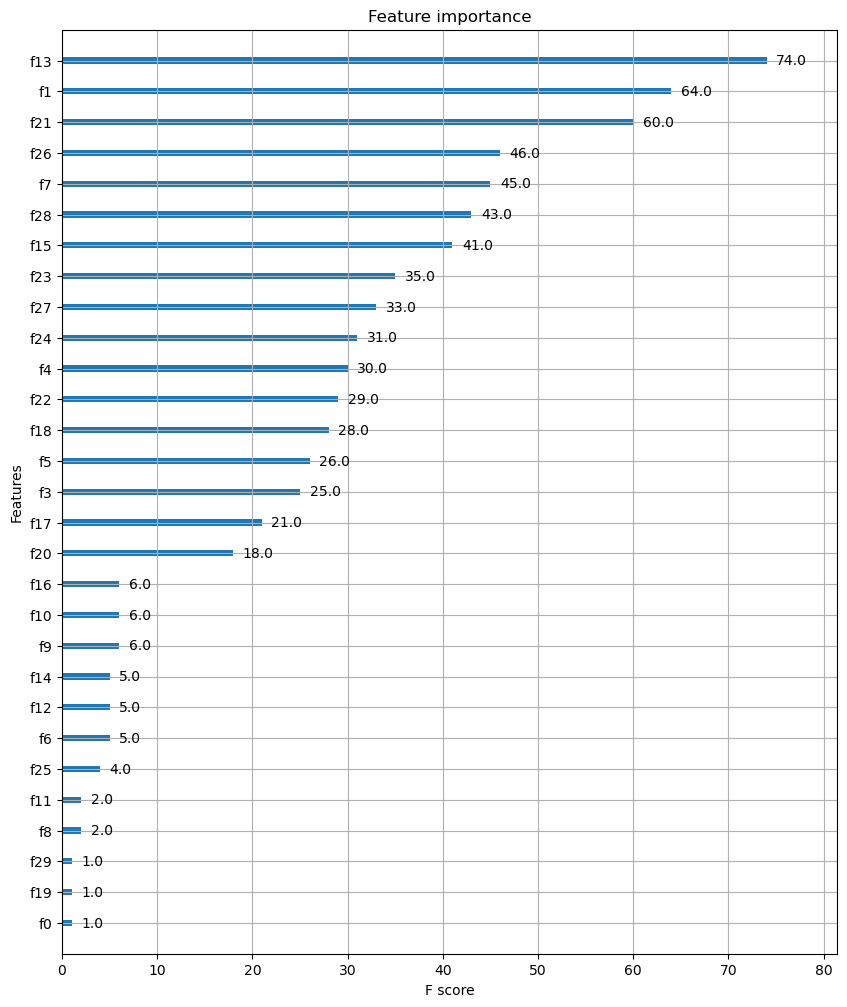

In [13]:
# 중요도 시각화(xgboost 내장 기능 이용)

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax=ax)

xgboost 모듈 내에 cv() API도 존재...

### 사이킷런 래퍼 XGBoost의 개요 및 적용

- 파이썬 래퍼 XGBoost와의 파라미터 차이
  - eta -> learning_rate
  - sub_sample -> subsample
  - lambda -> reg_lambda
  - alpha -> reg_alpha

In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC: 0.9951


In [15]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test, y_test)]  # 데이터셋의 크기가 작아서 그냥 테스트 데이터를 평가용으로 사용..
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss',
                eval_set = evals, verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1] # 끝까지 반복 안하고 311에서 멈춤

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [16]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC: 0.9954


In [17]:
# early_stopping_rounds를 10으로 설정하고 재학습

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = 'logloss',
                eval_set = evals, verbose = True)
ws10_preds = xgb_wrapper.predict(X_test)    # 너무 일찍 멈춰버림
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]   
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)   # 정확도도 ws100보다 낮음


[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

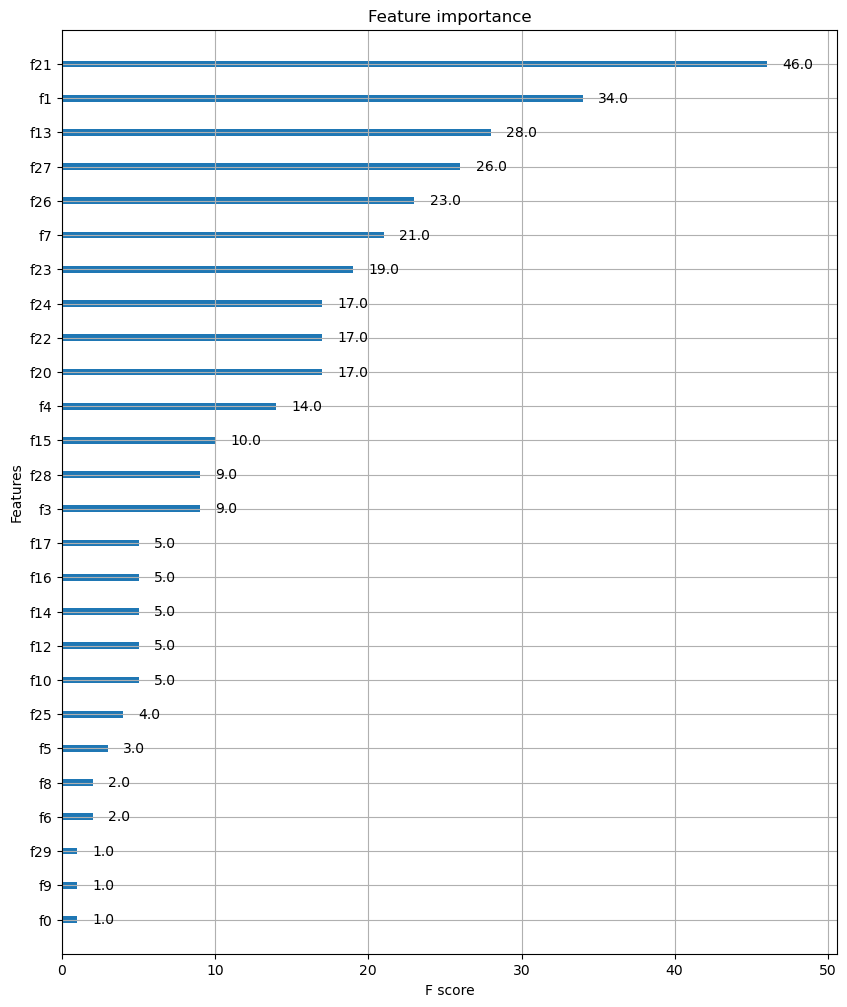

In [18]:
# 중요도 시각화

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_wrapper, ax=ax)